# Part I - 2019 - Lyft Bay Wheels E-Bike Dataset
## by Marius F.

## Introduction
The dataset is from a bike sharing company. The data was obtained from the following source: https://www.kaggle.com/datasets/dcshah/bay-wheels-2019-data/data

The data is organized in separate csv files for each month and contains data for all months 2019. Each row constitutes a bike ride where information about the bike ride has been recorded.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

## Gather

In [2]:
files = glob.glob(os.path.join('../../datasets/archive-2/', '*.csv'))
df_list = [pd.read_csv(f, low_memory=False) for f in files]
df = pd.concat(df_list)

## Assess

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null  

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN


In [5]:
print(df['user_type'].unique())
print(df['bike_share_for_all_trip'].unique())

['Customer' 'Subscriber']
['No' 'Yes' nan]


1. Data set has already been tidied in the gathering step by concatenating the monthly tables
2. *_id columns are floats instead of strings
3. date columns are strings instead of datetime objects
4. for the analysis it would be helpful to have separate columns for year, month, day and time of day
5. duration is given in seconds while minutes might be more proper unit
6. we only have abstract distance information given by longitude and lattitude which is difficult to work with
7. user_type and bike_share_for_all_trip are strings insead of nominal categories
7. the rental_access_method column has 95 % of missing data and coult be removed

## Clean

In [6]:
# Make copy of dataframe
df_clean = df.copy()

#### Convert id columns from float/int to strings and keep NaNs

In [7]:
# Convert float *_id columns to string
df_clean['start_station_id'] = df_clean['start_station_id'].apply(lambda x: np.nan if np.isnan(x) else str(x).split('.')[0])
df_clean['end_station_id'] = df_clean['end_station_id'].apply(lambda x: np.nan if np.isnan(x) else str(x).split('.')[0])


# Convert bike_id column to string
df_clean['bike_id'] = df_clean['bike_id'].astype(int)

In [8]:
# Test
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  object 
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  object 
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null  

#### Convert date columns to datetime type and create new columns with only month and time of day information

In [9]:
# Convert to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time']   = pd.to_datetime(df_clean['end_time'])

In [10]:
# Extract time information and store in new column
df_clean['month_start'] = df_clean['start_time'].dt.month
df_clean['day_start']   = df_clean['start_time'].dt.day
df_clean['hour_start']  = df_clean['start_time'].dt.hour
df_clean['month_end']   = df_clean['end_time'].dt.month
df_clean['day_end']     = df_clean['end_time'].dt.day
df_clean['hour_end']    = df_clean['end_time'].dt.day

In [11]:
month_cat = np.sort(df_clean['month_start'].unique())
month_cat = pd.api.types.CategoricalDtype(categories=month_cat, ordered=True)
day_cat   = np.sort(df_clean['day_start'].unique())
day_cat   = pd.api.types.CategoricalDtype(categories=day_cat, ordered=True)
hour_cat  = np.sort(df_clean['hour_start'].unique())
hour_cat  = pd.api.types.CategoricalDtype(categories=hour_cat, ordered=True)


df_clean = df_clean.astype({'month_start' : month_cat,
                            'month_end'   : month_cat,
                            'day_start'   : day_cat,
                            'day_end'     : day_cat,
                            'hour_start'  : hour_cat,
                            'hour_end'    : hour_cat})

In [12]:
# Test
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2426249 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2424081 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  int64         
 12  u

In [13]:
# Test
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month_start,day_start,hour_start,month_end,day_end,hour_end
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,...,12904,Customer,No,NaN,9,30,11,10,1,1
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,...,163,Customer,No,NaN,9,30,16,10,1,1
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,...,10737,Customer,No,NaN,9,30,23,10,1,1
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,...,10346,Customer,No,NaN,9,30,23,10,1,1
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,...,1349,Subscriber,No,NaN,9,30,23,10,1,1


#### Convert duration from seconds to minutes

In [14]:
df_clean['duration_min'] = df_clean['duration_sec']/60.
df_clean = df_clean.drop('duration_sec', axis=1)

In [15]:
# Test
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   start_time               2506983 non-null  datetime64[ns]
 1   end_time                 2506983 non-null  datetime64[ns]
 2   start_station_id         2426249 non-null  object        
 3   start_station_name       2426850 non-null  object        
 4   start_station_latitude   2506983 non-null  float64       
 5   start_station_longitude  2506983 non-null  float64       
 6   end_station_id           2424081 non-null  object        
 7   end_station_name         2424633 non-null  object        
 8   end_station_latitude     2506983 non-null  float64       
 9   end_station_longitude    2506983 non-null  float64       
 10  bike_id                  2506983 non-null  int64         
 11  user_type                2506983 non-null  object        
 12  b

#### Remove rental_access_method column

In [16]:
df_clean = df_clean.drop('rental_access_method', axis=1)

#### Convert user_type and bike_share_for_all_trip columns to categorical columns

In [17]:
df_clean['user_type']               = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

In [18]:
# Test
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   start_time               2506983 non-null  datetime64[ns]
 1   end_time                 2506983 non-null  datetime64[ns]
 2   start_station_id         2426249 non-null  object        
 3   start_station_name       2426850 non-null  object        
 4   start_station_latitude   2506983 non-null  float64       
 5   start_station_longitude  2506983 non-null  float64       
 6   end_station_id           2424081 non-null  object        
 7   end_station_name         2424633 non-null  object        
 8   end_station_latitude     2506983 non-null  float64       
 9   end_station_longitude    2506983 non-null  float64       
 10  bike_id                  2506983 non-null  int64         
 11  user_type                2506983 non-null  category      
 12  b

#### Calculate distance information in km using Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula)

In [19]:
def calc_dist(lat1, lat2, lon1, lon2, radius=6371.):
    """
    Calculate the great-circle distance between two points on the Earth's surface.
    
    This function computes the distance between two points given their latitude and
    longitude using the Haversine formula. It returns the distance in kilometers by default.
    
    Parameters:
    - lat1 : float or array-like
    Latitude of the first point in degrees.
    - lat2 : float or array-like
    Latitude of the second point in degrees.
    - lon1 : float or array-like
    Longitude of the first point in degrees.
    - lon2 : float or array-like
    Longitude of the second point in degrees.
    - radius : float, optional
    Radius of the Earth in the desired unit (default is 6371 km).
    
    Returns:
    - dist : float or array
    Distance between the two points in the unit corresponding to the given radius.
    
    Notes:
    - This function assumes that the Earth is a perfect sphere, which is a good approximation
    for most use cases but may not be accurate for very precise calculations.
    """
    
    # Convert degrees to radiants
    lat1, lat2, lon1, lon2 = np.array((lat1,lat2,lon1,lon2))*np.pi/180.

    # Calculate half the differences of the latitudes and longitudes
    lat_dist = (lat2 - lat1)/2.
    lon_dist = (lon2 - lon1)/2.
    
    # Compute inner term of haversine formula
    inner_term = np.sin(lat_dist)**2. + np.cos(lat1)*np.cos(lat2)*np.sin(lon_dist)**2.
    
    # Compute actual distance from inner term
    dist = 2.*radius*np.arcsin(np.sqrt(inner_term))
    
    return dist
    
# Apply calc_dist function to dataframe and save results in new column 'distance_km'
df_clean['distance_km'] = calc_dist(df_clean['start_station_latitude'], df_clean['end_station_latitude'],
                                    df_clean['start_station_longitude'], df_clean['end_station_longitude'])

In [20]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   start_time               2506983 non-null  datetime64[ns]
 1   end_time                 2506983 non-null  datetime64[ns]
 2   start_station_id         2426249 non-null  object        
 3   start_station_name       2426850 non-null  object        
 4   start_station_latitude   2506983 non-null  float64       
 5   start_station_longitude  2506983 non-null  float64       
 6   end_station_id           2424081 non-null  object        
 7   end_station_name         2424633 non-null  object        
 8   end_station_latitude     2506983 non-null  float64       
 9   end_station_longitude    2506983 non-null  float64       
 10  bike_id                  2506983 non-null  int64         
 11  user_type                2506983 non-null  category      
 12  b

In [21]:
df_clean.sample(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,bike_share_for_all_trip,month_start,day_start,hour_start,month_end,day_end,hour_end,duration_min,distance_km
75753,2019-06-18 20:41:47.975,2019-06-18 20:56:11.434,280,San Fernando St at 7th St,37.337122,-121.883215,357,2nd St at Julian St,37.341132,-121.892844,...,Subscriber,Yes,6,18,20,6,18,18,14.383333,0.960969
33051,2019-08-27 09:44:23.523,2019-08-27 09:46:39.685,36,Folsom St at 3rd St,37.783830,-122.398870,321,5th St at Folsom,37.780146,-122.403071,...,Subscriber,No,8,27,9,8,27,NaN,2.266667,0.551479
218078,2019-03-06 18:56:31.247,2019-03-06 18:59:05.317,275,Julian St at 6th St,37.342997,-121.888889,357,2nd St at Julian St,37.341132,-121.892844,...,Subscriber,Yes,3,6,18,3,6,6,2.566667,0.406505
143342,2019-07-05 21:06:07.384,2019-07-05 21:13:15.657,240,Haste St at Telegraph Ave,37.866043,-122.258804,245,Downtown Berkeley BART,37.870139,-122.268422,...,Subscriber,No,7,5,21,7,5,5,7.133333,0.959250
180725,2019-08-05 22:08:55.063,2019-08-05 22:18:23.828,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,87,Folsom St at 13th St,37.769757,-122.415674,...,Customer,No,8,5,22,8,5,5,9.466667,2.125176


### What is the structure of your dataset?

The cleaned dataset consists of 2506983 rows (observations) and 21 columns. Each row corresponds to a bike rental of an individual, where information such as rental time/period and travel distance have been recorded.


### What is/are the main feature(s) of interest in your dataset?
The main features of interest are the user_type (Customer or subscriber) and how the usage of the bike rental service differes between those users (e.g. in terms of rental (start) time and travel distance). Understanding the different user behaviors might help in coming up with a marketing campaign and special offers for those users and maybe converting regular customers into long term subscribers. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The travel distance and rental time are the most obvious features which will be of importance for the research to find user speciific attributes. But also time of day will help guiding the analysis since this can be used as indicator to e.g. find people who mainly use our bike to travel back from/to work and make special offers to those individuals. Similarly, different behaviors of the population according to the time of the year (can be extracted from the rental month) can serve similar marketing purposes.

## Univariate Exploration

Get an idea about the distribution parameter and ranges the values fall within

In [22]:
df_clean.describe()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,duration_min,distance_km
count,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02,2.789833e+04,1.346081e+01,2.167972e+00
std,1.363698e-01,3.089648e-01,2.392885e-01,7.080417e-01,1.146067e+05,3.291190e+01,7.750051e+01
min,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02,4.000000e+00,1.000000e+00,0.000000e+00
25%,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02,1.952000e+03,5.983333e+00,9.280850e-01
50%,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02,4.420000e+03,9.516667e+00,1.453611e+00
75%,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02,9.682000e+03,1.478333e+01,2.236969e+00
max,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,9.999410e+05,1.520183e+04,1.279973e+04


From this statistics summary we can already see that there are probably some things off with the data: 
1. For example, we see that the minimum travel distance is exactly 0 km, which does not make any sense and indicates that some of the data are erroneous. 
2. Furthermore, the maximum travel distance is more than 10000 km, which also is unrealistic. 
3. Also, a travel distance of exactly 0 km does not make any sense.

Additionally, the summary also already gives us an idea what might be the cause of some of these problems: 
1. The distance data shows that the longitude and lattitude have maximum and minimum values of 0°. Since at least the start location should be within the companies operation radius and also the end location  should at least be within the US (it is reasonable to assume that it is not allowed to take the rental bike across the countrie's borders). 
2. These smooth and round numbers referring to unreasonable data indicate that these data potentially refer to some standard values entered into the database automatically.

#### However, let us first take a look at the original data to see how these apparently erroneous data affect our distributions and how many of such data we have.

### Exploration of rental time data (duration_min)

Firstly, we are interested in the distribution of bike rental times. From the above statistics summary, we already know that 75 % of the data fall between short bike rides of 1 - 15 min, i.e. the bin sizes should be small (about 1 min) to get an insightful histogram. However, a maximum value of more than 10000 min would result in a meaningless histogram in that case. <br>
Hence, we first plot the histogram on a subset of the data to get an idea of what the distribution looks like.

Text(0.5, 0, 'Ride Duration [min]')

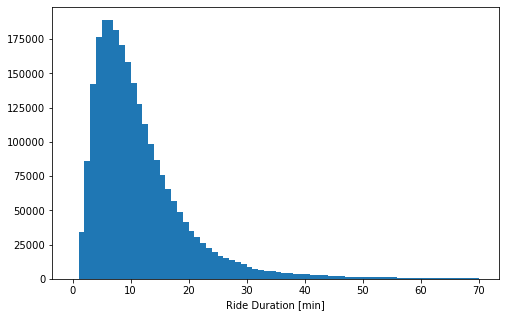

In [23]:
# Filtering the DataFrame to consider only rows where duration_min is less than a certain value
df_subset = df_clean[df_clean['duration_min'] < 70]

bin_size = 1
bins = np.arange(0, df_subset['duration_min'].max()+bin_size, bin_size)

# Now, plotting the histogram for the subset
bins = np.arange(0, df_subset['duration_min'].max()+bin_size, bin_size)
plt.figure(figsize=[8, 5])
plt.hist(data=df_subset, x='duration_min', bins=bins);
plt.xlabel('Ride Duration [min]')

We see that we have a highly right skewed distribution very few large outliers. However, from the graph we can see that the majority of users uses our bike service for rather short trips in the range of 5 - 15 min.<br>
Now, let us see plot the whole dataset on a log scale to see if this corresponds to a log normal distribution and to get a better idea of the distribution of all of the data points.

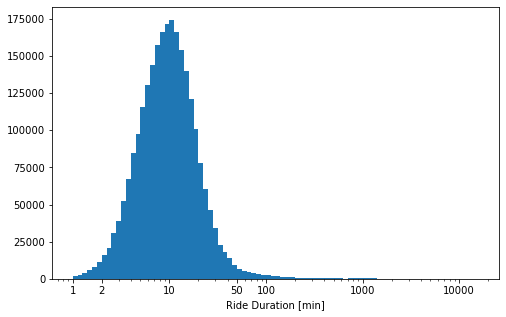

In [24]:
bin_size = 0.05
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + bin_size, bin_size)
plt.figure(figsize=[8, 5])
plt.hist(data=df_clean, x='duration_min', bins=bins);
plt.xscale('log')
plt.xlabel('Ride Duration [min]')

xticks = [1, 2, 10, 50, 100, 1000, 10000]
plt.xticks(xticks, xticks);

### Exploration of travel distance data (distance_km)

We have seen some extreme skewness in the travel duration and already have explained an idea/hypothesis about the reasons for these skewness, i.e. we attributed extreme values to erroneous data.
Since travel time and trip length are expected to be highly correlated, it makes sense to first take a look at the trip length data before attempting to fix the aforementioned issues.
<br>
For this - since we already know about the extreme skewness - we will first take a look at a subset of the data corresponding to more resonable data.

Text(0.5, 0, 'Trip length [km]')

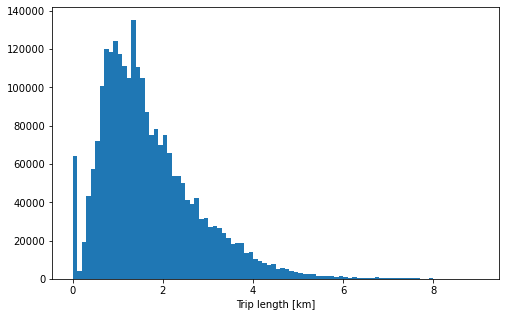

In [25]:
# Filtering the DataFrame to consider only rows where distance_km is less than a certain value
df_subset = df_clean[df_clean['distance_km'] < 9]

bin_size = 0.1
bins = np.arange(0, df_subset['distance_km'].max()+bin_size, bin_size)

# Now, plotting the histogram for the subset
bins = np.arange(0, df_subset['distance_km'].max()+bin_size, bin_size)
plt.figure(figsize=[8, 5])
plt.hist(data=df_subset, x='distance_km', bins=bins);
plt.xlabel('Trip length [km]')

From the trip length distribution we can see that we not only have a strong right skewed distribution but also see that we have a significant amount of data close to or equal zero.  However, from this plot we see tha the majority of users travel distances 0.2 to 3 km, i.e. the majority of users use the service for rather short trips. <br>
Next, we take again a look at the full data on a log-transformed scale to get a picture of the distribution of the whole dataset in terms of trip length.

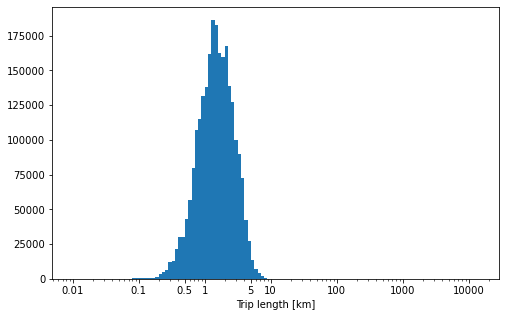

In [26]:
bin_size = 0.05
bins = 10 ** np.arange(-2, np.log10(df_clean['distance_km'].max())+bin_size, bin_size)

plt.figure(figsize=[8, 5])
plt.hist(data=df_clean, x='distance_km', bins=bins);
plt.xscale('log')
plt.xlabel('Trip length [km]')
xticks = [0.01, 0.1, 0.5, 1, 5, 10, 100, 1000, 10000]
plt.xticks(xticks, xticks);

And this graph confirms our initial idea of the trip length and distance being correlated in terms of distributions. Both of these properties are extremely right skewed to similar extents and the extremely small small values (exactly 0 km traveled in exactly 1 min) also seem unrealistic and the extent to which these data affect our statistics and distributions is non-negligible and needs to be fixed which will be done in the following.

### Take a step back and fix issues related to distance_km and duration_min (Second iteration of cleaning)

We have figured out some issues with our data and inn this second iteration of wrangling will attempt to fix these issues.

#### Remove data points which refer to the unreasonable locations

In [27]:
# Create mask which removes data which seem to be erroneous
mask = ( (df_clean['start_station_latitude']>0.5) & (df_clean['end_station_latitude']>0.5) &
         (df_clean['start_station_longitude']<-0.5) & (df_clean['end_station_longitude']<-0.5) )

df_clean1 = df_clean[mask].copy()
print(df_clean.shape, df_clean1.shape)

(2506983, 21) (2506891, 21)


#### What about those extreme outliers with more than 10k+ min travel time?

In [28]:
df_clean1[df_clean1['duration_min']>2000]

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,bike_share_for_all_trip,month_start,day_start,hour_start,month_end,day_end,hour_end,duration_min,distance_km
124395,2019-12-19 23:15:36,2019-12-30 12:37:26,NaN,NaN,37.323757,-121.878614,NaN,NaN,37.327656,-121.868598,...,Customer,NaN,12,19,23,12,30,NaN,15201.833333,0.986081


It seems that there is only one such extreme outlier. This person only traveled a very small distance but rented the bike for more than 9 days. That person probably just forgot to return the bike or end the rental period via the app. Such user behavior should be removed from the analysis.

In [29]:
df_clean1.drop(df_clean1[df_clean1['duration_min']>2000].index, axis=0, inplace=True)

#### What about customers who had very travel time or distance?

We also have some data points where the travel distance is less than 100 m or the duration is exactly one minute. Those were probably either faulty database entries (smooth round numbers) or customers, whose bike broke or experienced some other problems with the service. They should also be removed from the analysis as we saw from the distributions that they could also be considered as outliers since there only is a very small fraction of those on the extreme left side of the distributions.

In [30]:
mask = ((df_clean1['duration_min']>1.) & (df_clean1['distance_km']>0.1))
df_clean1 = df_clean1[mask]

Now, after cleaning - let us look again at the statistical summary of our data.

In [31]:
df_clean1.describe()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,duration_min,distance_km
count,2.442896e+06,2.442896e+06,2.442896e+06,2.442896e+06,2.442896e+06,2.442896e+06,2.442896e+06
mean,3.776603e+01,-1.223518e+02,3.776622e+01,-1.223511e+02,2.745911e+04,1.289981e+01,1.742959e+00
std,1.062028e-01,1.235560e-01,1.060965e-01,1.229135e-01,1.134788e+05,2.909644e+01,1.074063e+00
min,3.726805e+01,-1.225143e+02,3.673954e+01,-1.225143e+02,1.100000e+01,1.016667e+00,1.000418e-01
25%,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02,1.952000e+03,6.000000e+00,9.589612e-01
50%,3.778053e+01,-1.223983e+02,3.778065e+01,-1.223981e+02,4.427000e+03,9.450000e+00,1.487217e+00
75%,3.779539e+01,-1.222935e+02,3.779539e+01,-1.222948e+02,9.681000e+03,1.455000e+01,2.272570e+00
max,3.789530e+01,-1.218117e+02,3.791296e+01,-1.214695e+02,9.984300e+05,1.437167e+03,1.429716e+02


The summary looks more reasonable now. The default and very extreme values have been removed. There are still some large values but they do not look unreasonable. They probably either refer to customers who did a long bike trip or used the bike to commute from and to work. In either case, these customers are probably wealthy and there is no reason to assume that these large values are unreasonable. Additionally, the small remaining small values do not refer anymore to default database entries. It is not entirely clear if these small values correspond to people who just did e.g. a small trip to the city or if there are reasons to exclude them from the analysis.

#### There is no need to plot the distributions of duration_min and distance_km again as we just removed some obvious outliers and the descriptive statistics tells us that the data still is skewed to the right (log normal distribution) but to a lesser amount than previously. The previous analysis still holds.

Save cleaned dataframe to file for use in part 2 (slide deck) of presentation:

In [32]:
df_clean1.to_csv('cleaned_bikeshare_dataset.csv', index=False)

### Cleaning Done: Continue with EDA

Now that we have further cleaned our data from erroneous and/or unreasonable entries, we are in a position to continue with the analysis/EDA.

So far, we have only looked at the distributions of numerica values (distance and duration). But as mentioned earlier, we are mostly interested in the connection of these numeric values to the types of users who produced them and to investigate the time dependence of such data. As a preparatory step for such analysis, we need to have an idea of the univariate distribution these data to see if there are customer types or times of the year which are underrepresented in our data set or to see whether there is a an overall (user-independent trend).

### Exploration of users properties (user_types and bike_share_for_all_trip)

Firstly, we are interested in how man users are regular customers and how many subscribers we already have in order to have a baseline for the further user-dependent analysis.

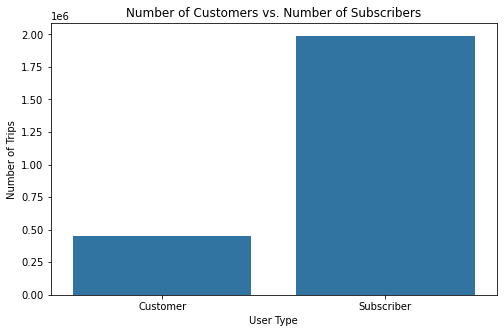

In [33]:
color = sb.color_palette()[0]

plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='user_type', color=color);
plt.ylabel('Number of Trips')
plt.xlabel('User Type')
plt.title('Number of Customers vs. Number of Subscribers');

From the above plot we can see that we already have much more trips made by subscribers than than by regular customers (about four times as much). This is reasonable since regular customers have a much bigger hurdle to overcome to use the service (account setup, payment, etc.) and reinforces our desire to turn regular customers into subscribers.

Another important reference point to establish is for the number subsidised users, which will be done in the following plot:

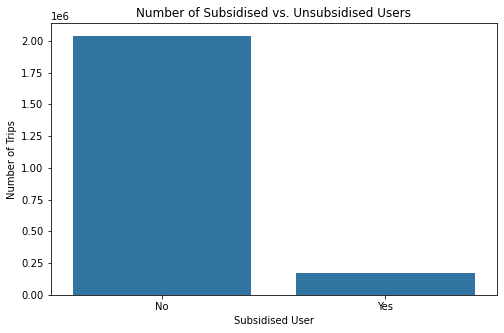

In [34]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='bike_share_for_all_trip', color=color);
plt.ylabel('Number of Trips')
plt.xlabel('Subsidised User')
plt.title('Number of Subsidised vs. Unsubsidised Users');

From the above plot we can see that there were many more trips made by subsidised user than for non-subsidised users (about 10 times more) which indicates that the requirements for getting subsidised are high and, hence, we only have a small amount of users who get subsidised.

### Exploration of time dependence of bike Usage (Hour of Day, Day in Month and Month in Year)

Now, that we got an idea about the distribution of users as well as the  distances and durations of bike trips, the last piece of important information is the time dependence of the bike trips, which will be investigated in this section. Since we already know that most bike trips are well below an hour, using the start of the trip or the end of the trip for time measurement should lead to similar results. However, using the start of the trip is more intuitive and might open up the potential to more insights later on, we will investigate the time dependence also here in terms of the start date/time.

The first time dependent qantitiy we will look at is the distribution of bike rides in terms of months of the year. This will provide us with some insight on whether there are certain times of the year where bike rentals are more popular.

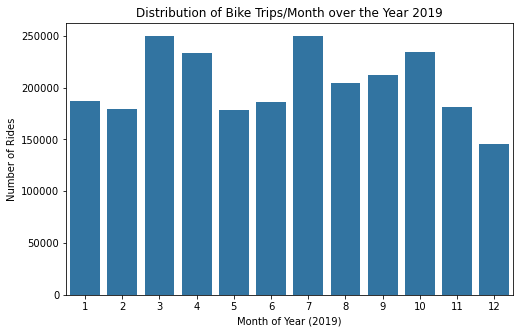

In [35]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='month_start', color=color);
plt.ylabel('Number of Rides')
plt.xlabel('Month of Year (2019)')
plt.title('Distribution of Bike Trips/Month over the Year 2019');

From the above graph it becomes obvious that the number of bike rides is by far lowest during winter (November, December, January and February). Then, at the beginning of spring there is a sharp increase in bike rides. In May and June the number of bike rides drops sharply. This is rather unexpected. The only theory I could come up with is that people may be on vacation and that during those months there are some more public holidays. However, at the peak of summer (July) there is again a sharp increase and the number of bike rides stays at a comparatively high level until the mid of autumn where weather usually still is nice/interesting. 

Having had a look at the distribution of bike rides over month, the next logical step it to look at the distributions over the days of the month to see if there any additional insights to gain from that graph:

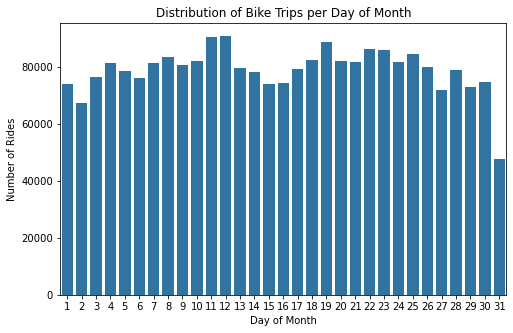

In [36]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='day_start', color=color);
plt.ylabel('Number of Rides')
plt.xlabel('Day of Month')
plt.title('Distribution of Bike Trips per Day of Month');

At fist sight this graph does not provide much insight. However, looking more closely one realises that it seems like there is a bimodal distribution where the dividing point is the exact mid of the month. While there is an increase of rides from the beginning to the middle of the month, the opposite hold when looking at the second half of the month. This is, however, difficult to interpret. One possible explanation might be that at the beginning of the month pay checks start to come in and people have money to spend while towards the end of the month people may be more prone to saving money. However, to make sense of the local minimum at the middle of the month we might need more information.

A potential way to make more sense of daily data in a more intuitive fashion is to look at the day of the week instead of the day of the month. For this, we mapped the numeric values of the days to the week days and plotted the distribution of bike rides over week days:

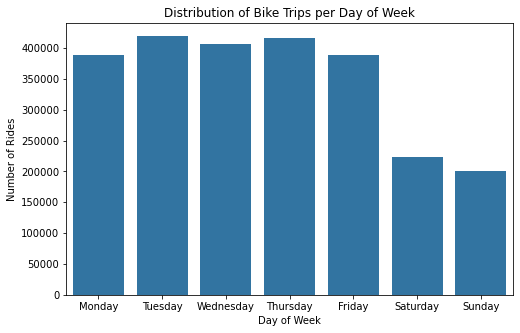

In [37]:
# Get day of week from numeric value
df_clean1['day_of_week_start'] = df_clean1['start_time'].dt.day_name()

# Make day of week an ordinal variable
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cat = pd.api.types.CategoricalDtype(categories=days, ordered=True)
df_clean1['day_of_week_start'] = df_clean1['day_of_week_start'].astype(day_cat)

# Plot distribution
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='day_of_week_start', color=color);
plt.ylabel('Number of Rides')
plt.xlabel('Day of Week')
plt.title('Distribution of Bike Trips per Day of Week');

This graph is much more insightful. We can clearly see that the number of bike rides during week days is much greater than it is during weekends. This is a strong indication that the most people use the bike service for work and/or shopping related bike trips than it is for weekend trips and also coincides with the theory expressed during cleaning that long rental periode may be due to people who intentionally hold a bike during working hours to have it definitely available for the way back.

The most fine-grained analysis in terms of time-dependence will be done on the hour of the day distributions, which is depicted below:

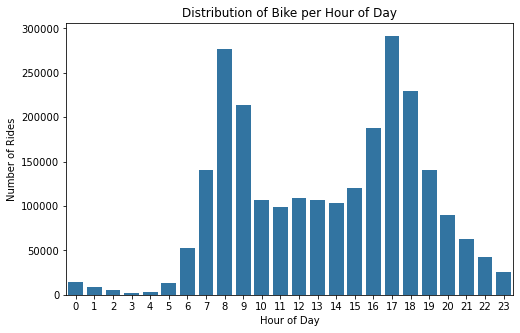

In [38]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='hour_start', color=color);
plt.ylabel('Number of Rides')
plt.xlabel('Hour of Day')
plt.title('Distribution of Bike per Hour of Day');

This graph can be seen as a confirmation of the insights gained from the day of week analysis. The distribution is bimodal with peaks at most people's start and end of the working day. This is again a hint that the service is mostly used for work commutes. During 10:00 and 15:00 the usage of the service seems to be constantly on a medium level, possibly indicating students commuting to and from university.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Unusual points were mostly related to extremely high rental times and travel distances. Some of these most extreme outliers have been removed since they could be clearly attributed to erroneous data. However, the distributions of distances and durations are unimodal and still right skewed (log normal distributions) but the remaining values which are responsible seem legit and reasonable have, hence, not been removed. Hence, these were plotted on a logarithmic x-scale.
2. There were also some unreasonably small values in the distance and duration columns which partially could be removed since they were probably corresponding to some default database entries. However, the remaining small values were kept.
3. The time dependent data were the most interesting since they lead to the conclusion that most people use the bike service mostly to commute to and from work. Furthermore, it was found that the service is mostly used during week days.
4. The customer type data did ot hold any surprises. They clearly show that most rides are performed by subscribers and the subsidised service is only used by a small fraction of the people.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The only distribution I would consider a bit 'unusual' (whatever that means in this context) is the distribution of bike rides over days of the month. It is difficult to make sense of the dip and subsequent short increase of bike rides in the middle of the month. We probably need more information to find an explanation for that.

The tidying and transformation that have been performed are the following:
1. Create separate columns for hour, day, month and day of week to have different levels the data can be analysed on. Working with pure time + date data does not provide any insights and it is difficult to work with.
2. The month, day, hour of day and day of week data have been transformed to ordinal categorical data as they should be ordered when plotting and inherently possess a natural order.
3. The latitude and longitude information has been used to extract actual interpretable distances in kilometers.
4. The duration has been converted from seconds to minutes to avoid huge numbers on axis and since these are also more natural/interpretable units to work with.
5. The data was contained in different files for each month. These were all merged into a single master dataframe.
6. The user_type and bike_share_for_all columns have been converted from strings to nominal categorical variables since they do not possess a natural/useful order.
7. The column rental_access_method has been removed since it barely contained any usable values.

## Bivariate Exploration

Havin investigated the distributions of key properties of our data, we will now start looking at the relationships between two variables to gain a deeper understanding and draw more conclusions from our data. Since we have seen in the previous section that the monthly data as well as the data corresponding to the day of the year are somewhat difficult to interpret, we will not look at these data in this section but only in the next section on multivariate exploration where we can then also look at relationships between these categorical data and additionally make the most important distinction, i.e. differentiate between user types.

### Exploration of travel duration as function of time

In the following we will take a look at the travel duration as function of the weekday and the hour of the day to gain a deeper understanding of the usage of the rental service. What we are interested to get more information on is whether the rental service is potentially used for longer trips on weekends or outside of working hours indicating that users are using the service for freetime bike rides on weekends or outside working hours. We will use a box plot to ignore outliers for now and to get a meaningful statistical summary in terms of median and interquantil range (IQR) which are metrics robust to outliers.

Text(0.5, 1.0, 'Travel Durations for each Hour of the Day')

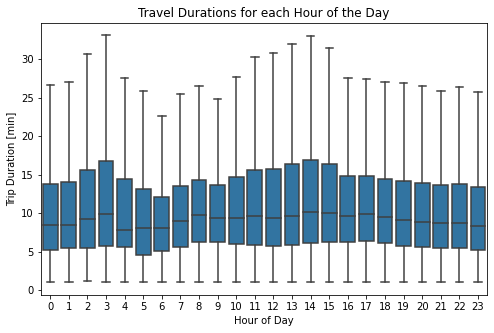

In [39]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df_clean1, x='hour_start', y='duration_min', showfliers=False, color=color)
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration [min]')
plt.title('Travel Durations for each Hour of the Day')

Text(0.5, 1.0, 'Traveled Durations for each Weekday')

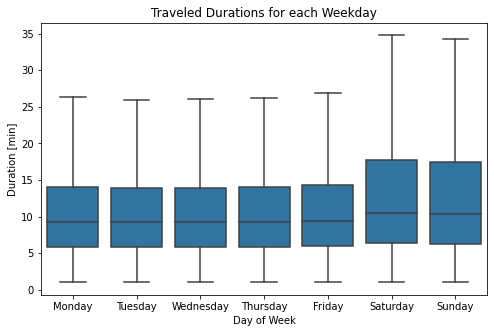

In [40]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df_clean1, x='day_of_week_start', y='duration_min', showfliers=False, color=color)
plt.xlabel('Day of Week')
plt.ylabel('Duration [min]')
plt.title('Traveled Durations for each Weekday')

From the above two graphs we can see that the summay statistics for the hour of the day indicate the bike usage is almost identical for each hour of the date. The medians have maximum deviations of only about 2 min and so do the IQRs. This is interesting as it indicates that during each hour of the day - irrespective of working hours where we previously observed much more traffic - the majority of users use the service only for 5 - 15 min. This indicates that our service indeed is mostly used for any kind of commuting, be it between home and work or to go shopping or to visit friends, etc.
<br>
Similar conclusions can be drawn from the graph referring to the days of the week, which shows almost identical rental duration for each week day and then consistently slightly higher duration for week days. This could point to the fact that  during weekends people are more relaxed and therefore take a bit longer for a commute but still excludes the initial idea that our bike service is for long weekend trips.

### Exploration of travel distance as function of time

To verify the above conclusions we will analyse the distances traveled as function of the same ordinal variables, i.e. time of day and day of week.

Text(0.5, 1.0, 'Traveled Distances for each Hour of the Day')

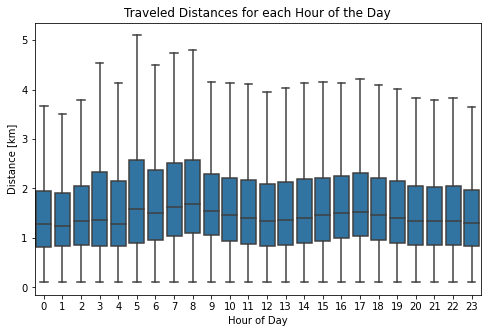

In [41]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df_clean1, x='hour_start', y='distance_km', showfliers=False, color=color)
plt.xlabel('Hour of Day')
plt.ylabel('Distance [km]')
plt.title('Traveled Distances for each Hour of the Day')

Text(0.5, 1.0, 'Traveled Distances for each Weekday')

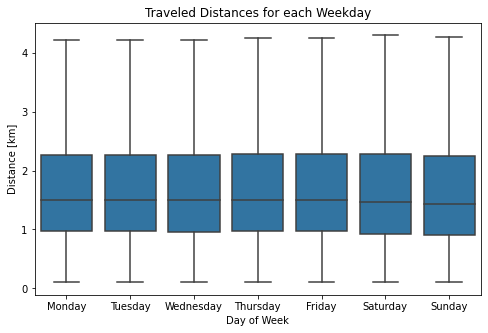

In [42]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df_clean1, x='day_of_week_start', y='distance_km', showfliers=False, color=color)
plt.xlabel('Day of Week')
plt.ylabel('Distance [km]')
plt.title('Traveled Distances for each Weekday')

The above two graphs for the travel distance show almost the exact same picture as the previous ones about the travel duration. The travel distance is almost identical for any day of the week and the travel distances are all very similar for each hour of the day. This indicates that our hypothesis of people travelling the same routes on weekdays and weekends but in a more relaxed fashion on weekends might be correct.

### Exploration of time dependent bike usage according to user type
Now, that we got a broad idea of how our rental service is used taking all users into account, it is interesting to see whether there are certain times or days where customers or subscribers tent to use the service more often. For this, we use a clustered bar chart to compare the distributions for each user type dependent of the hour of the day or the week day.

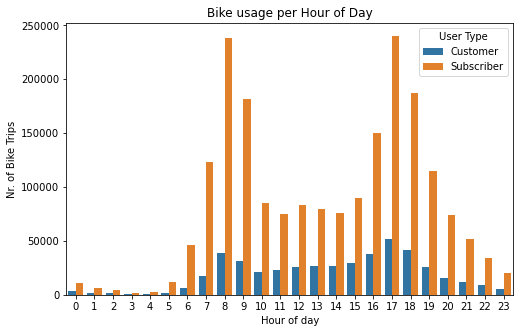

In [43]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='hour_start', hue='user_type')
plt.title('Bike usage per Hour of Day')
plt.xlabel('Hour of day')
plt.ylabel('Nr. of Bike Trips')
plt.legend(title='User Type')

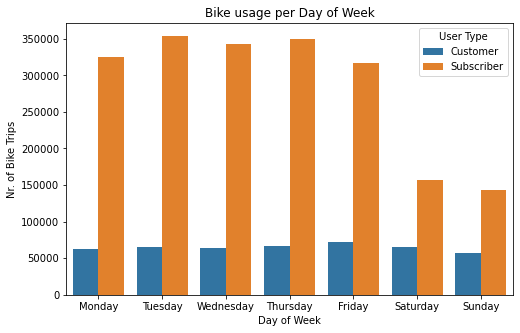

In [44]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='day_of_week_start', hue='user_type')
plt.title('Bike usage per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Nr. of Bike Trips')
plt.legend(title='User Type')

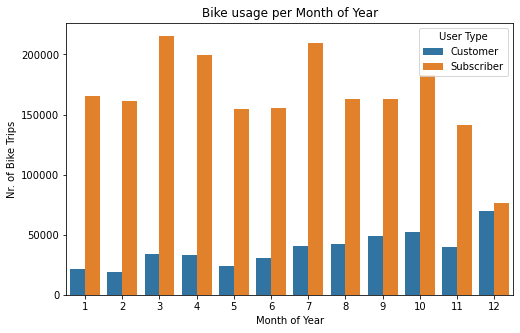

In [45]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean1, x='month_start', hue='user_type')
plt.title('Bike usage per Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Nr. of Bike Trips')
plt.legend(title='User Type')

As we have already seen from our univariate analysis that we have many more subscribers than custoers, it is no surprise that also in each time interval the bars corresponding to subsribers are much higher. <br><br>
Concerning the the bike usage per hour of day, both distributions look similar in terms of general shape, i.e. both users types have bimodal distributions with peaks at the start and the end of the working day. What is interesting, however, is that those peaks are much more pronounced for the subscribers while being more flat foro customers. This indicates that more of the customers use the service for commuting from and to work. However, since the peaks for customers are less pronounced this indicates that a larger fraction of customers use the service of intraday activities or for shopping or there are more students - who have a less strict defined schedule - using our service as customers.
<br><br>
Concerning the usage as function of day of week, we can again see a distinction between customers and subscribers. The customer distribution seems uniform with no differences on any day while the subscriber distribution shows a strong decline in usage on weekends. This again suggests that a larger fraction of subscribers uses our service for work commutes while the customer distribution may include more free time trips.
<br><br>

Lastly, we have also invesigated the bike usage number per month. There are some surprises here concerning the regular customers. Contrary to our expectations the number of regular customers rides increases almost monotonically throughout the year and reaches its maximum at December while the number of subscriber descreases towards the end of the year. We would have expected customers to peak in summer for freetime activities. This might be a hint that during winter time many subscribers ended their subscription and became regular customers due to the fact that they use their bike less often. To investigate this trend more thoroughly would require more data and also inter-year comparisons.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Travel distance and duration are almost almost identical for each hour of day and day of week. These properties seem to not be very correlated with time. => Bike service seems to be used for similar purposes at any given time.
2. A much larger fraction of subscribers seem to use the service for commuting to work. The main use cases of the service seem to be identical for both user types. However, the uniform distribution for day of week and the flatter distribution for hour of day indicate that a larger fraction of customers tend to use the service also for free time activities.

## Multivariate Exploration

So far, we have only looked at bivariate plots where we either compare properties of all users dependent on time or we look at user distributions without additional properties. However, what we are actually interested in is to compare properties among user groups, i.e. multivariate plots which will be given in this section.

### Exploration of user-dependent travel distances as function of time

Taking off from the last section where we looked at the time dependence of travel distance for the whole population of users, we will now try to gain more insights by looking at this time dependence of travel distance for each user type to get a comparison of user behavior. This will again be done using a box plot (without plotting outliers) to get an idea about the majority of users.

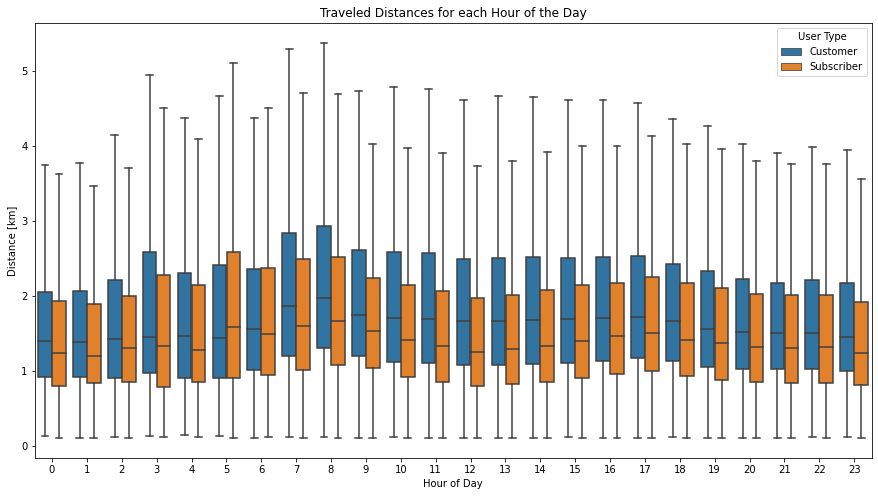

In [46]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df_clean1, x='hour_start', y='distance_km', hue='user_type', showfliers=False)
plt.xlabel('Hour of Day')
plt.ylabel('Distance [km]')
plt.title('Traveled Distances for each Hour of the Day')
plt.legend(title='User Type')

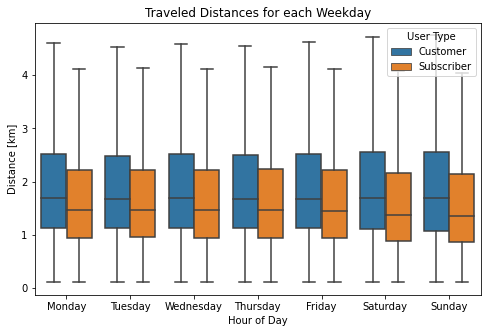

In [47]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df_clean1, x='day_of_week_start', y='distance_km', hue='user_type', showfliers=False)
plt.xlabel('Hour of Day')
plt.ylabel('Distance [km]')
plt.title('Traveled Distances for each Weekday')
plt.legend(title='User Type', loc='upper right')

The above data clearly shows that customers travel longer distances at each and every hour of the day as well as on each day of the week. The differences in median and IQR are largest in the middle of the day, i.e. during working hours.
<br>
Concerning the travel distances depending on the week day it is very interesting to see that both properties are almost invariant under the day of the week. The custoners stay at higher travel distances but there are almost no time dependent fluctuations.

### Exploration of user-dependent travel durations as function of time

To keep our analysis consistent, we will now also again have a separate look at the travel duration in the same fashion as we have investigated the travel distance. This is useful since we already have previously seen that these two properties yield complementary information.

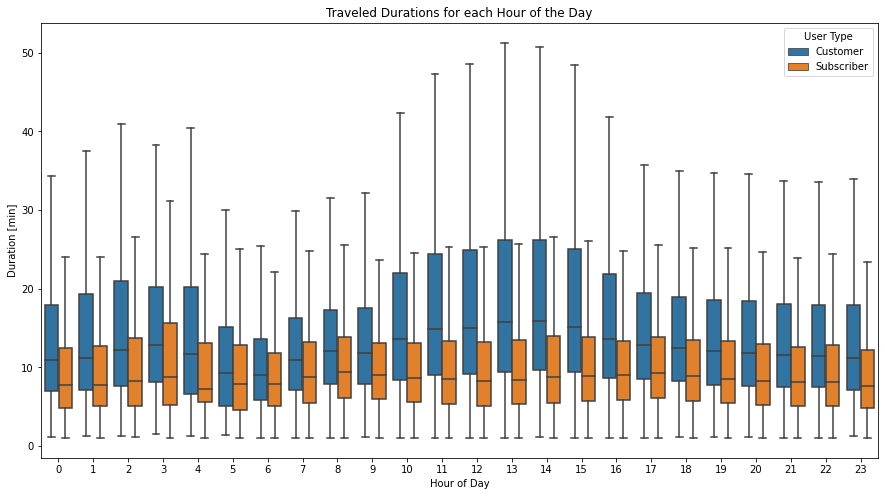

In [48]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df_clean1, x='hour_start', y='duration_min', hue='user_type', showfliers=False)
plt.xlabel('Hour of Day')
plt.ylabel('Duration [min]')
plt.title('Traveled Durations for each Hour of the Day')
plt.legend(title='User Type')

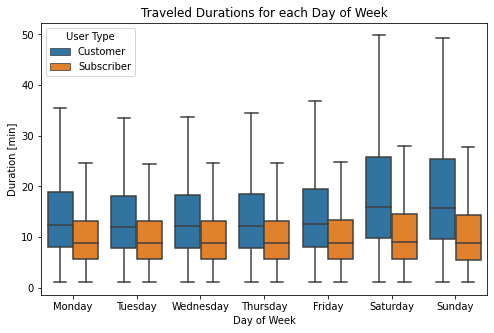

In [49]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df_clean1, x='day_of_week_start', y='duration_min', hue='user_type', showfliers=False)
plt.xlabel('Day of Week')
plt.ylabel('Duration [min]')
plt.title('Traveled Durations for each Day of Week')
plt.legend(title='User Type')

For the travel durations similar findings as previously described for the distance data can be observed. However, for the hourly comparisons we see much larger deviations of customer data compared to subscriber data. Especially, between 10:00 and 16:00 the travel durations of customers are almost twice as large as those of subscribers (in terms of median and IQR).
<br>
For the day of week data we see that customers travel durations increase on the weekend while those of the subscribers stay constant.

### Exploration of customer properties (travel distance and duration) based on monthly data

As we have already seen in the bivariate analysis, the number of subscriber rides per month decreases towards the end of the year while the number of customer rides increases. We also know that customers and subscribers can be differentiated according to travel time and distance. Hence, if our previous assumption about the conversion of subscribers to customers during winter is correct, we should also see a convergence of customer properties towards subscriber properties. <br>
For this, we have plotted the median travel distance and duration as function of the month of the year below. Here, we have used a point plot to keep the plots as simple as possible while still plotting the (for our analysis) most important metric, i.e. the median.

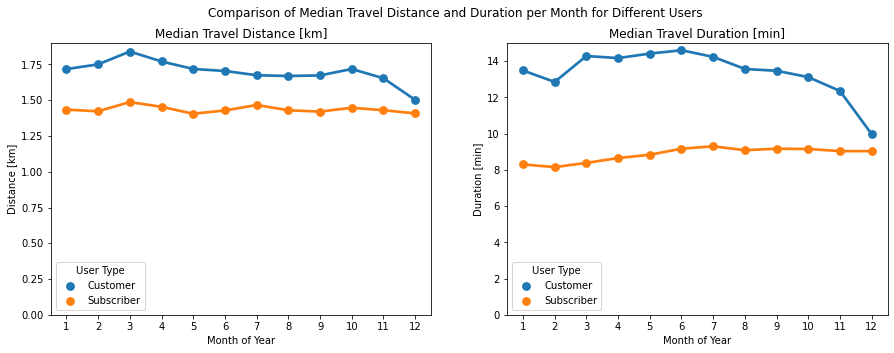

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.pointplot(data=df_clean1, x='month_start', y='distance_km', hue='user_type', estimator=np.median, ci=None)
plt.xlabel('Month of Year')
plt.ylabel('Distance [km]')
plt.legend(title='User Type')
plt.ylim(0, 1.9);
plt.title('Median Travel Distance [km]');

plt.subplot(1, 2, 2)
sb.pointplot(data=df_clean1, x='month_start', y='duration_min', hue='user_type', estimator=np.median, ci=None)
plt.xlabel('Month of Year')
plt.ylabel('Duration [min]')
plt.legend(title='User Type')
plt.ylim(0, 15);
plt.title('Median Travel Duration [min]');

plt.suptitle('Comparison of Median Travel Distance and Duration per Month for Different Users');

The above graphs clearly show the anticipated trend. As subscriber rides decrease and customer rides increase during the beginning of winter, the corresponding properties (travel distance and duration) of the customers seem to converge towards the subscribers data. This does strengthen our hypothesis of subscribers converting to customers. A decrease of travel time and duration seems natural but if it was due to the weather in winter we should see the same trend in the subscribers data but these data seem to be invariant under weather changes (time of the year).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. We have found that the the customer travel distance and duration are systematically higher than the corresponding values of the subscribers across all metrics of our summary.
2. Additionally, the comparison of customer data to subscriber data suggests that customers tend to use the bike more often and for longer travels during the middle of the day (during regular working hours) and on weekends than subscribers.

### Were there any interesting or surprising interactions between features?

The most surprising and most important finding was that it seems like subscribers are converting to regular customers at the end of the year. This could have a multitude of reasons, which we don't have the data to pin down, but it might be a concern for the company. Hence, while our initial goal was to find ways to make customers convert to subscribers, the more urgent issue to prevent subscribers to convert to customers.

## Conclusions
1. From the univariate analysis we have seen that we already have substantially more customers than subscribers and that there are outliers in the distance and duration metrics which we mostly have ignored in the analysis. We have also seen that our service seems to be mostly used for work commutes.
2. From the bivariate analysis we have found that customers and subscribers overall tend to use the bike service for similar purposed but also that a larger fraction of customers tend to use the service for free time activities or that a larger fraction of customers could be students with a less strict time schedule than regular workers.
3. Combining the bivariate and multivariate analysis we have then come to a surprising conclusion. We have seen that customers tend to use the service for longer durations and distances and have previously also seen that the towards the end of the year the bike rides of customers increases while the bike rides of decrease. Combining these information with the fact that travel duration and distance of customers become much more similar to one another, suggesting that subscribers turn to customers towards the end of the year. Hence, our focus should currently not be to try converting customers to subscribers but rather to prevent subscribers converting into customers.